## 1. Introduction

The health inequality data describe life expectency with parameters like houshold gender, Household income. It is interesting to see how these play a role in overlall life expectency of people.
Life expectency data is sourced from https://healthinequality.org/data/ and is publicly available.


I would like to focus on comparing life expectancy between females and males. This will assist researchers in understanding how gender differences contribute to life expectancy. Such insights could lead to new breakthroughs that improve overall life expectancy.

## 2. Hypothesis

**H₀:** There is no significant difference between the average life expectency of person based on gender.

**Hₐ:**  There is a significant difference between the life expectency of person based on gender.

## 3. Data 

The data comes from [healthinequality](https://healthinequality.org/dl/health_ineq_online_table_2.csv) and contains 2,800 life expectenacy observations and 9 variables. There are no missing values; empty entries.

1400 records are male and 1400 are female records. Two samples are of same size.

In [48]:
# setup environment
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
# unable to use datafrom the web link so downloaded to local and using the downloaded file
#data location 'https://healthinequality.org/dl/health_ineq_online_table_2.csv'
# load the data
file='/Users/tkma56b/Downloads/health_ineq_online_table_2.csv'
le=pd.read_csv(file)

le.info()
le.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gnd            2800 non-null   object 
 1   pctile         2800 non-null   int64  
 2   year           2800 non-null   int64  
 3   count          2800 non-null   int64  
 4   hh_inc         2800 non-null   float64
 5   le_agg         2800 non-null   float64
 6   le_raceadj     2800 non-null   float64
 7   sd_le_agg      2800 non-null   float64
 8   sd_le_raceadj  2800 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 197.0+ KB


,gnd,pctile,year,count,hh_inc,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,2001,398740,499.10938,79.682068,79.893463,0.392838,0.385240
1,F,1,2002,411159,541.30695,79.183594,79.410622,0.353981,0.346817
2,F,1,2003,420298,529.13910,79.364410,79.572174,0.364780,0.359097
3,F,1,2004,427728,499.29950,79.898407,80.092476,0.352018,0.347992
4,F,1,2005,433665,474.14536,80.283600,80.465935,0.334612,0.330986


In [17]:
# count records by gender
print(le[['gnd']].groupby(le['gnd']).agg(['count']))

      gnd
    count
gnd      
F    1400
M    1400


## 4. Methods

For this analysis, I will create two DataFrames, one containing all records for female and another for all males. 
If the distributions of life expectency appear to be close to normally distributed based on their histogram, skewness, and kurtosis, I will conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval.

In [18]:
# split data to male and female groups
le_female=le[le["gnd"]== 'F']
le_male=le[le["gnd"]== 'M']
print("number of females" , len(le_female))
print("number of males" , len(le_male))
print("average life expectenacy FOR MALE ", le_male.le_agg.mean())
print("average life expectenacy FOR FEMALE", le_female.le_agg.mean())

number of females 1400
number of males 1400
average life expectenacy FOR MALE  81.70168135571429
average life expectenacy FOR FEMALE 85.55313111642857


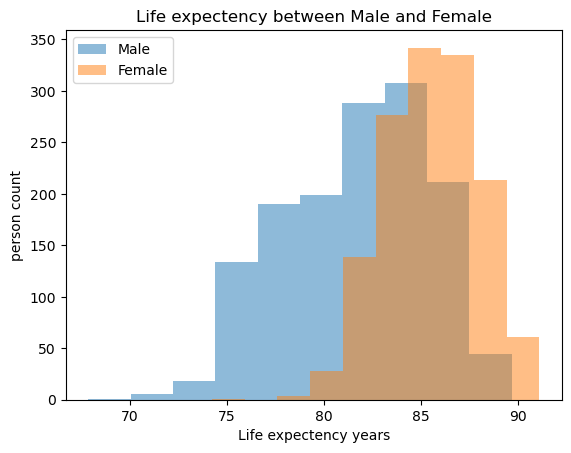

DescribeResult(nobs=1400, minmax=(67.862122, 89.698997), mean=81.70168135571429, variance=13.791445970948235, skewness=-0.31864664071009474, kurtosis=-0.6867268476986266)
DescribeResult(nobs=1400, minmax=(74.229156, 91.120705), mean=85.55313111642857, variance=5.54516781332986, skewness=-0.1963013183736166, kurtosis=-0.25072458614603965)


In [46]:
# Plot the histogram

plt.hist(le_male['le_agg'], alpha = .5 , label="Male")
plt.hist(le_female['le_agg'], alpha = .5, label="Female")
plt.xlabel("Life expectency years")
plt.ylabel("person count")
plt.title('Life expectency between Male and Female')
plt.legend(loc='upper left')
plt.show()

print(stats.describe(le_male['le_agg']))
print(stats.describe(le_female['le_agg']))

In [21]:
# Conduct the t-test

stats.ttest_ind(le_male['le_agg'], le_female['le_agg'])

TtestResult(statistic=-32.7716300446846, pvalue=1.197061026093231e-199, df=2798.0)

In [25]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(le_male['le_agg'], le_female['le_agg']))

# What is the current average life expectency for female?

print(le_female["le_agg"].mean())

The difference in means at the 95% confidence interval (two-tail) is between 3.621102917401733 and 4.081796604026844.
85.55313111642857


## 5. Results

Based on a visual inspection, life expectency is close enough to normally distributed that I could proceed with the t-test. Based on a t test value -32.77, I reject the null that there is no significant difference in means. 

The 95% confidence interval suggests that the difference in the average life expectency between the male and female is between \\3.62 and \\4.08 years. Currently, the average life expectency in females is about 85.55. 

## 6. Discussion and recommendation

On average, life expectancy is notably higher in females than in males. 

However, besides biological differences, life expectancy can be influenced by factors such as household income, lifestyle choices, and various work-related stress factors. Therefore, exploring these findings further add confirmation that geneder significantly changes life expectency.

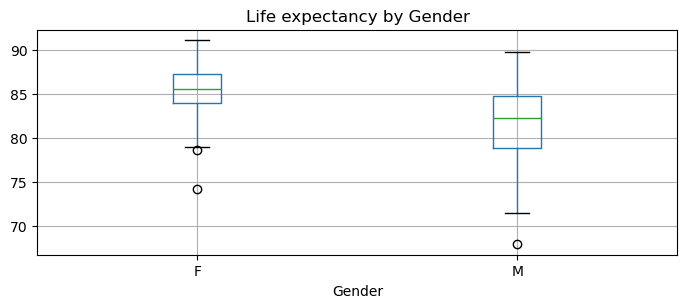

In [64]:
lr =le.rename(columns={"le_agg": "Life Expectancy in Years", "gnd": "Gender"})


lr.boxplot('Life Expectancy in Years', by='Gender', figsize=(8, 3))
title_boxplot = 'Life expectancy by Gender'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
#plt.set_xlabel('Gender')
#plt.set_ylabel('Life expectency Years')
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.show()